In [ ]:
#import the libraries

In [4]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [204]:
#scrap the data given the by url 

In [5]:
url = "https://www.timeanddate.com/weather/india/salem/hourly"
req = requests.get(url)
soup = BeautifulSoup(req.text, 'html.parser')


In [ ]:
# table 

In [203]:
table = soup.find("div",'tb-scroll')


In [ ]:
#scarp the table

In [7]:
df = pd.read_html(str(table))
df1 = pd.DataFrame(df[0])
df1 

Unnamed: 0_level_0  \
                                                 Time   
0                              14.00 मंगलवार 25 जुलाई   
1                                               15.00   
2                                               16.00   
3                                               17.00   
4                                               18.00   
5                                               19.00   
6                                               20.00   
7                                               21.00   
8                                               22.00   
9                                               23.00   
10                              00.00 बुधवार 26 जुलाई   
11                                              01.00   
12                                              02.00   
13                                              03.00   
14                                              04.00   
15                                              05.00   
16                                              06.00   
17                                              07.00   
18                                              08.00   
19                                              09.00   
20                                              10.00   
21                                              11.00   
22                                              12.00   
23                                              13.00   
24  * Updated मंगलवार 25 जुलाई 2023 12:18:02 Salem...   

                                           Conditions  \
                                   Unnamed: 1_level_1   
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
5                                                 NaN   
6                                                 NaN   
7                                                 NaN   
8                                                 NaN   
9                                                 NaN   
10                                                NaN   
11                                                NaN   
12                                                NaN   
13                                                NaN   
14                                                NaN   
15                                                NaN   
16                                                NaN   
17                                                NaN   
18                                                NaN   
19                                                NaN   
20                                                NaN   
21                                                NaN   
22                                                NaN   
23                                                NaN   
24  * Updated मंगलवार 25 जुलाई 2023 12:18:02 Salem...   

                                                       \
                                                 Temp   
0                                               29 °C   
1                                               29 °C   
2                                               29 °C   
3                                               28 °C   
4                                               27 °C   
5                                               27 °C   
6                                               26 °C   
7                                               25 °C   
8                                               24 °C   
9                                               24 °C   
10                                              24 °C   
11                                              24 °C   
12                                              24 °C   
13                                              23 °C   
14                                         

In [205]:
# scrap data convert to the csv file 

In [8]:
df1.to_csv("weather.csv")

In [206]:
#load the data

In [133]:
data=pd.read_csv("weather.csv")

In [134]:
data.head()

,Unnamed: 0,Unnamed: 0_level_0,Conditions,Conditions.1,Conditions.2,Comfort,Comfort.1,Comfort.2,Comfort.3,Precipitation,Precipitation.1
0,NaN,Time,Unnamed: 1_level_1,Temp,Weather,Feels Like,Wind,Unnamed: 6_level_1,Humidity,Chance,Amount
1,0.0,14.00 मंगलवार 25 जुलाई,NaN,29 °C,Passing showers. Overcast.,32 °C,15 km/h,↑,68%,24%,0.1 mm (rain)
2,1.0,15.00,NaN,29 °C,Passing showers. Overcast.,32 °C,13 km/h,↑,67%,24%,0.1 mm (rain)
3,2.0,16.00,NaN,29 °C,Passing showers. Overcast.,32 °C,10 km/h,↑,68%,24%,0.1 mm (rain)
4,3.0,17.00,NaN,28 °C,Passing showers. Overcast.,31 °C,8 km/h,↑,68%,24%,0.1 mm (rain)


In [135]:
data=data.rename(columns={"Unnamed: 0_level_0":'Time',"Conditions.1":'Temp',"Conditions.2":'Weather',"Comfort.1":'wind',"Comfort.3":'Humidity',"Precipitation":'Chance',"Precipitation.1":'Amount'})

In [207]:
#data cleaning procees

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  25 non-null     float64
 1   Time        26 non-null     object 
 2   Conditions  2 non-null      object 
 3   Temp        26 non-null     object 
 4   Weather     26 non-null     object 
 5   Comfort     26 non-null     object 
 6   wind        26 non-null     object 
 7   Comfort.2   26 non-null     object 
 8   Humidity    26 non-null     object 
 9   Chance      26 non-null     object 
 10  Amount      26 non-null     object 
dtypes: float64(1), object(10)
memory usage: 2.4+ KB


In [137]:
data.columns


Index(['Unnamed: 0', 'Time', 'Conditions', 'Temp', 'Weather', 'Comfort',
       'wind', 'Comfort.2', 'Humidity', 'Chance', 'Amount'],
      dtype='object')

In [138]:

data.drop(index=1,inplace=True)
data.drop(index=13,inplace=True)
data.drop(index=25,inplace=True)

In [139]:
data.head()

,Unnamed: 0,Time,Conditions,Temp,Weather,Comfort,wind,Comfort.2,Humidity,Chance,Amount
0,NaN,Time,Unnamed: 1_level_1,Temp,Weather,Feels Like,Wind,Unnamed: 6_level_1,Humidity,Chance,Amount
2,1.0,15.00,NaN,29 °C,Passing showers. Overcast.,32 °C,13 km/h,↑,67%,24%,0.1 mm (rain)
3,2.0,16.00,NaN,29 °C,Passing showers. Overcast.,32 °C,10 km/h,↑,68%,24%,0.1 mm (rain)
4,3.0,17.00,NaN,28 °C,Passing showers. Overcast.,31 °C,8 km/h,↑,68%,24%,0.1 mm (rain)
5,4.0,18.00,NaN,27 °C,Passing showers. Overcast.,29 °C,7 km/h,↑,72%,24%,0.1 mm (rain)


In [140]:
data.drop(columns=['Unnamed: 0'],axis=1)

,Time,Conditions,Temp,Weather,Comfort,wind,Comfort.2,Humidity,Chance,Amount
0,Time,Unnamed: 1_level_1,Temp,Weather,Feels Like,Wind,Unnamed: 6_level_1,Humidity,Chance,Amount
2,15.00,NaN,29 °C,Passing showers. Overcast.,32 °C,13 km/h,↑,67%,24%,0.1 mm (rain)
3,16.00,NaN,29 °C,Passing showers. Overcast.,32 °C,10 km/h,↑,68%,24%,0.1 mm (rain)
4,17.00,NaN,28 °C,Passing showers. Overcast.,31 °C,8 km/h,↑,68%,24%,0.1 mm (rain)
5,18.00,NaN,27 °C,Passing showers. Overcast.,29 °C,7 km/h,↑,72%,24%,0.1 mm (rain)
6,19.00,NaN,27 °C,Passing showers. Overcast.,28 °C,6 km/h,↑,73%,24%,0.1 mm (rain)
7,20.00,NaN,26 °C,Passing showers. Overcast.,27 °C,5 km/h,↑,77%,24%,0.1 mm (rain)
8,21.00,NaN,25 °C,Passing showers. Overcast.,26 °C,4 km/h,↑,79%,23%,0.1 mm (rain)
9,22.00,NaN,24 °C,Passing showers. Overcast.,25 °C,2 km/h,↑,80%,21%,0.1 mm (rain)
10,23.00,NaN,24 °C,Overcast.,25 °C,1 km/h,↑,81%,0%,-


In [141]:
data.drop(index=12,inplace=True)

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 0 to 24
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  21 non-null     float64
 1   Time        22 non-null     object 
 2   Conditions  1 non-null      object 
 3   Temp        22 non-null     object 
 4   Weather     22 non-null     object 
 5   Comfort     22 non-null     object 
 6   wind        22 non-null     object 
 7   Comfort.2   22 non-null     object 
 8   Humidity    22 non-null     object 
 9   Chance      22 non-null     object 
 10  Amount      22 non-null     object 
dtypes: float64(1), object(10)
memory usage: 2.1+ KB


In [143]:
data.head()

,Unnamed: 0,Time,Conditions,Temp,Weather,Comfort,wind,Comfort.2,Humidity,Chance,Amount
0,NaN,Time,Unnamed: 1_level_1,Temp,Weather,Feels Like,Wind,Unnamed: 6_level_1,Humidity,Chance,Amount
2,1.0,15.00,NaN,29 °C,Passing showers. Overcast.,32 °C,13 km/h,↑,67%,24%,0.1 mm (rain)
3,2.0,16.00,NaN,29 °C,Passing showers. Overcast.,32 °C,10 km/h,↑,68%,24%,0.1 mm (rain)
4,3.0,17.00,NaN,28 °C,Passing showers. Overcast.,31 °C,8 km/h,↑,68%,24%,0.1 mm (rain)
5,4.0,18.00,NaN,27 °C,Passing showers. Overcast.,29 °C,7 km/h,↑,72%,24%,0.1 mm (rain)


In [154]:
data.reset_index(inplace=True)

In [155]:
data.drop(index=10,inplace=True)

In [160]:
data=data.drop(columns=['Unnamed: 0','Conditions','Comfort.2','index','level_0'])

In [161]:
data.isnull().sum()

Time        0
Temp        0
Weather     0
Comfort     0
wind        0
Humidity    0
Chance      0
Amount      0
dtype: int64

In [208]:
# data preprocessing

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns 

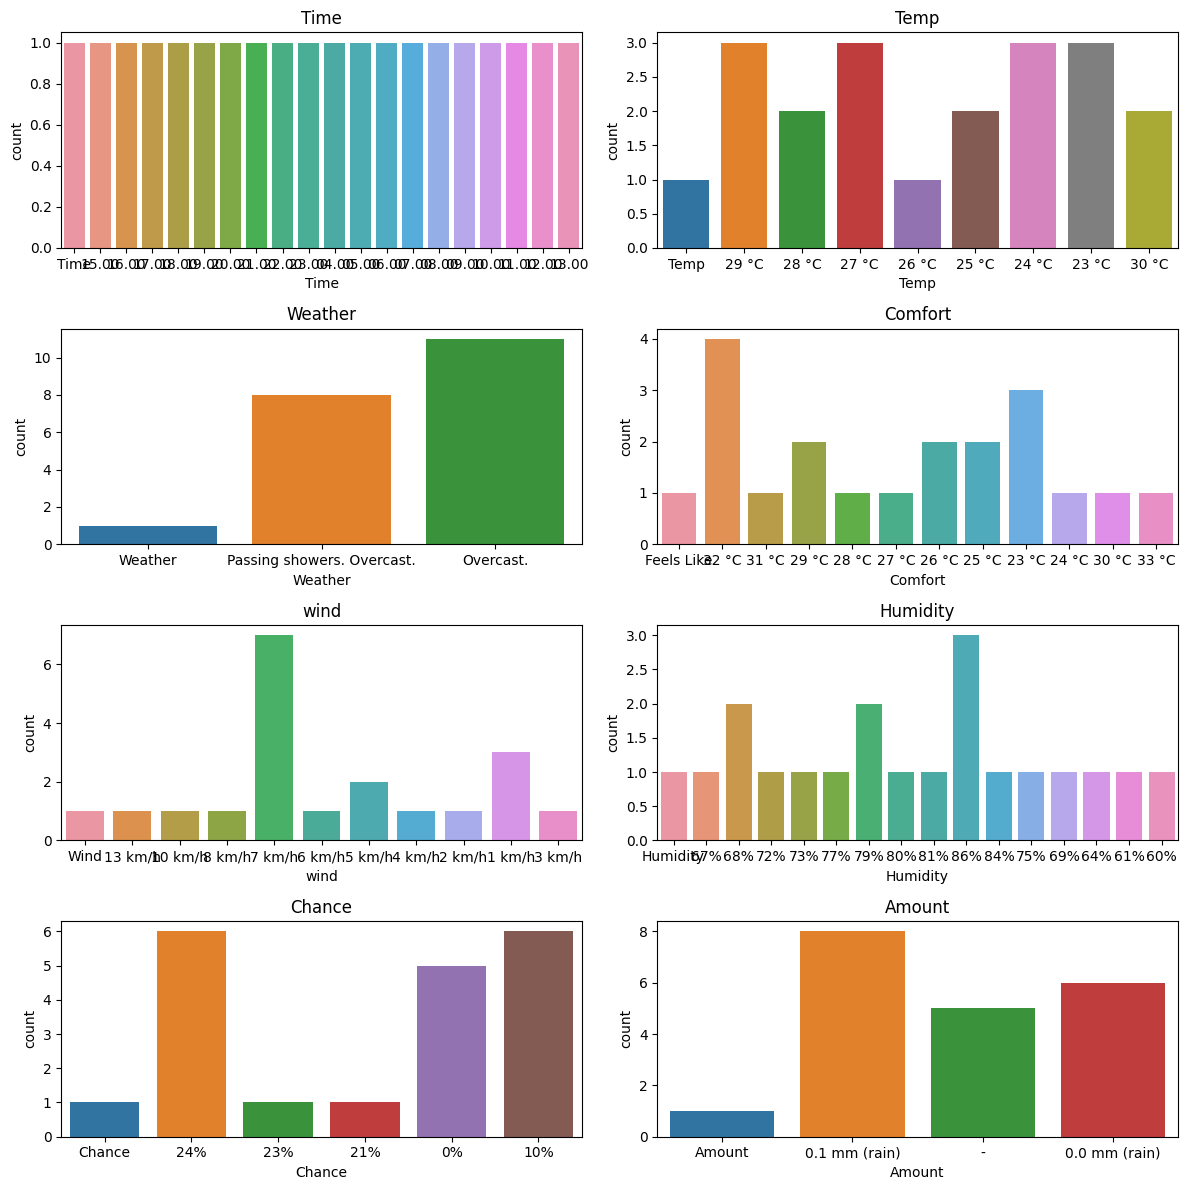

In [163]:
num_cols=data.columns
nrows = 4
ncols = 2
iterator = 1
fig = plt.figure(figsize=(12, 12))
for i in num_cols:
    ax = fig.add_subplot(nrows, ncols, iterator)
    sns.countplot(data=data, x=i, ax=ax)
    plt.title(i)
    iterator+=1
    
plt.tight_layout()
plt.show()

In [164]:
data.head()
data=data.drop(index=0)

In [165]:
data['Temp'] = data['Temp'].str.replace('°C', '')
data['Comfort'] = data['Comfort'].str.replace('°C', '')
data['wind'] = data['wind'].str.replace('km/h', '')
data['Humidity'] = data['Humidity'].str.replace('%', '')
data['Chance'] = data['Chance'].str.replace("%", "")

In [166]:
data.head()

,Time,Temp,Weather,Comfort,wind,Humidity,Chance,Amount
1,15.00,29,Passing showers. Overcast.,32,13,67,24,0.1 mm (rain)
2,16.00,29,Passing showers. Overcast.,32,10,68,24,0.1 mm (rain)
3,17.00,28,Passing showers. Overcast.,31,8,68,24,0.1 mm (rain)
4,18.00,27,Passing showers. Overcast.,29,7,72,24,0.1 mm (rain)
5,19.00,27,Passing showers. Overcast.,28,6,73,24,0.1 mm (rain)


In [167]:
print(data.dtypes)

Time        object
Temp        object
Weather     object
Comfort     object
wind        object
Humidity    object
Chance      object
Amount      object
dtype: object


In [168]:
data['Temp'] = data['Temp'].astype(int)
data['Comfort']=data['Comfort'].astype(int)
data['Humidity']=data['Humidity'].astype(int)
data['Chance']=data['Chance'].astype(int)
data['wind']=data['wind'].astype(int)

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 1 to 20
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Time      19 non-null     object
 1   Temp      19 non-null     int32 
 2   Weather   19 non-null     object
 3   Comfort   19 non-null     int32 
 4   wind      19 non-null     int32 
 5   Humidity  19 non-null     int32 
 6   Chance    19 non-null     int32 
 7   Amount    19 non-null     object
dtypes: int32(5), object(3)
memory usage: 988.0+ bytes


In [170]:
import numpy as np

In [171]:
data.select_dtypes(include = np.number).columns

Index(['Temp', 'Comfort', 'wind', 'Humidity', 'Chance'], dtype='object')

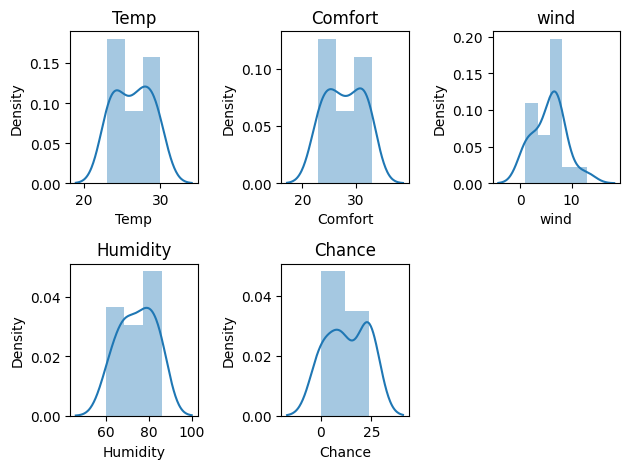

In [172]:
num_cols = ['Temp', 'Comfort', 'wind', 'Humidity', 'Chance']

nrows = 2
ncols = 3
iterator = 1

for i in num_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.distplot(data.loc[:, i]) # distplot returns the shape
    plt.title(i)
    iterator+=1
    
plt.tight_layout()
plt.show()

In [173]:
data=data.set_index('Time')
data.head()

,Temp,Weather,Comfort,wind,Humidity,Chance,Amount
Time,,,,,,,
15.00,29,Passing showers. Overcast.,32,13,67,24,0.1 mm (rain)
16.00,29,Passing showers. Overcast.,32,10,68,24,0.1 mm (rain)
17.00,28,Passing showers. Overcast.,31,8,68,24,0.1 mm (rain)
18.00,27,Passing showers. Overcast.,29,7,72,24,0.1 mm (rain)
19.00,27,Passing showers. Overcast.,28,6,73,24,0.1 mm (rain)


In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 15.00 to 13.00
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Temp      19 non-null     int32 
 1   Weather   19 non-null     object
 2   Comfort   19 non-null     int32 
 3   wind      19 non-null     int32 
 4   Humidity  19 non-null     int32 
 5   Chance    19 non-null     int32 
 6   Amount    19 non-null     object
dtypes: int32(5), object(2)
memory usage: 836.0+ bytes


In [175]:
data.shape

(19, 7)

In [176]:
data.isnull().sum()

Temp        0
Weather     0
Comfort     0
wind        0
Humidity    0
Chance      0
Amount      0
dtype: int64

In [209]:
#encodeing the data cateiegory to numercial value

In [177]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [178]:
encoded_data = label_encoder.fit_transform(data['Weather'])

In [179]:
data['Weather']=encoded_data

In [180]:
encoded_data2 = label_encoder.fit_transform(data['Amount'])


In [181]:
data['Amount']=encoded_data2

In [182]:
data

,Temp,Weather,Comfort,wind,Humidity,Chance,Amount
Time,,,,,,,
15.00,29,1,32,13,67,24,2
16.00,29,1,32,10,68,24,2
17.00,28,1,31,8,68,24,2
18.00,27,1,29,7,72,24,2
19.00,27,1,28,6,73,24,2
20.00,26,1,27,5,77,24,2
21.00,25,1,26,4,79,23,2
22.00,24,1,25,2,80,21,2
23.00,24,0,25,1,81,0,0


In [183]:
train = data.loc['15.00':'06.00']
test = data.loc['07.00':'13.00']

In [184]:
x_train = train.drop(columns = ['Temp'])
y_train = train['Temp']
x_test = test.drop(columns = ['Temp'])
y_test = test['Temp']

In [185]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(12, 6)
(12,)
(7, 6)
(7,)


In [210]:
#model buliding 
# random forest is used because this is the future perdiction (supervised meachine learing)

In [186]:
from sklearn.ensemble import RandomForestRegressor

In [187]:
rf = RandomForestRegressor(max_depth=20, random_state = 42,n_estimators=150)

In [188]:
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, n_estimators=150, random_state=42)

In [189]:
rf_train_score = rf.score(x_train, y_train)
rf_test_score = rf.score(x_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9936439393939394
0.3607088512241048


In [190]:
pred = rf.predict(x_test)
train_pred = rf.predict(x_train)
print(pred)
print(train_pred)

[23.47333333 24.84       26.12666667 26.62666667 27.22666667 27.22
 27.22      ]
[28.82       28.61333333 28.08666667 27.06       26.83333333 25.89333333
 24.94       24.29333333 23.8        23.05333333 23.05333333 23.07333333]


In [191]:
prediction_df = x_test
prediction_df['Temp'] = y_test
prediction_df['Predicted Temp'] = pred
prediction_df.head()

,Weather,Comfort,wind,Humidity,Chance,Amount,Temp,Predicted Temp
Time,,,,,,,,
07.00,0,24,5,84,10,1,24,23.473333
08.00,0,26,7,79,0,0,25,24.840000
09.00,0,29,7,75,0,0,27,26.126667
10.00,0,30,7,69,0,0,28,26.626667
11.00,0,32,7,64,0,0,29,27.226667


In [192]:
prediction_df.shape

(7, 8)

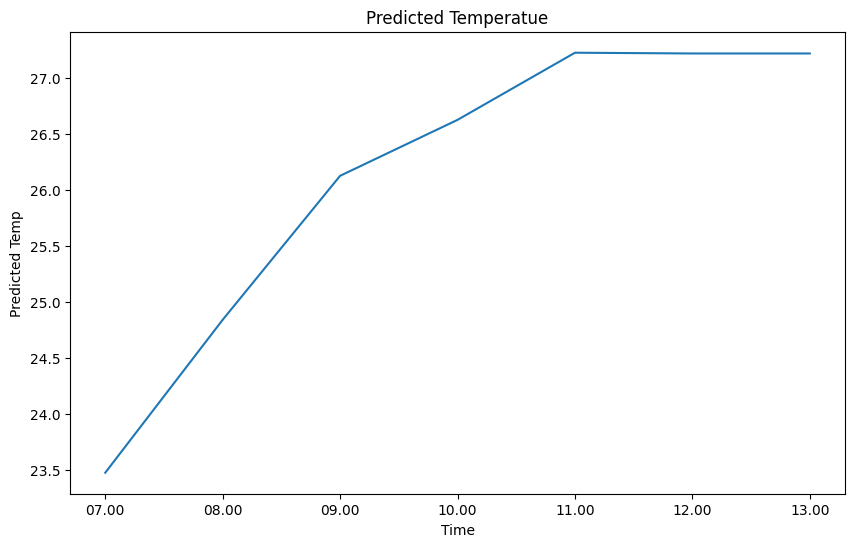

In [193]:
plt.figure(figsize=(10, 6))
plt.plot(prediction_df['Predicted Temp'])
plt.xlabel('Time')
plt.ylabel('Predicted Temp')
plt.title('Predicted Temperatue')
plt.show()


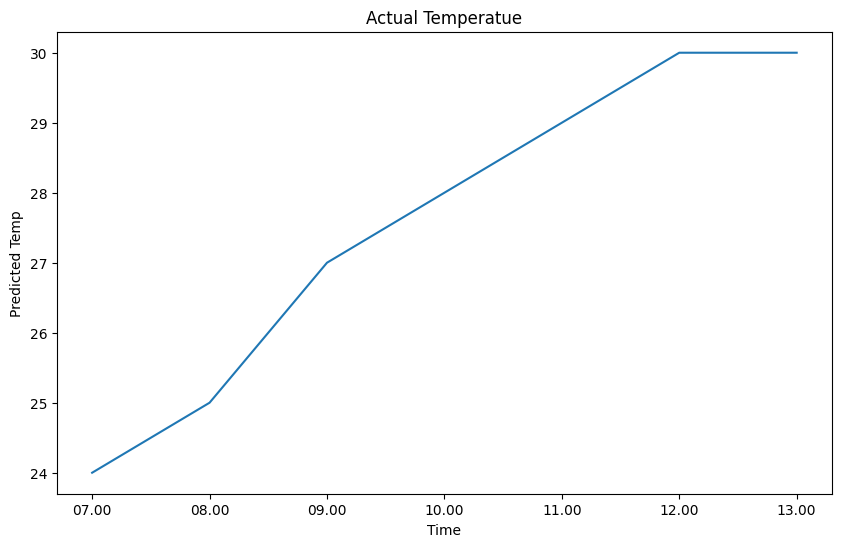

In [194]:
plt.figure(figsize=(10, 6))
plt.plot(prediction_df['Temp'])
plt.xlabel('Time')
plt.ylabel('Predicted Temp')
plt.title('Actual Temperatue')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


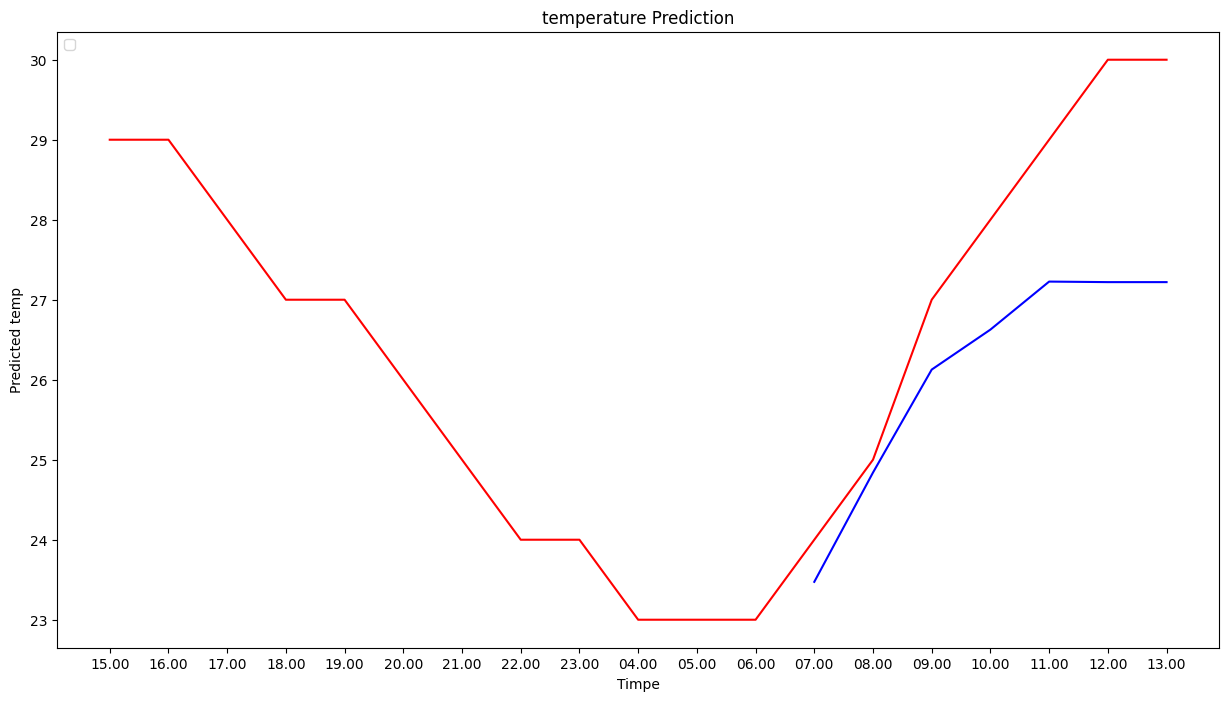

In [195]:
plt.subplots(figsize=(15, 8))
plt.title("temperature Prediction")
plt.plot(data['Temp'], color='red', linestyle='solid')
plt.plot(prediction_df['Predicted Temp'], color='blue', linestyle='solid')
plt.xlabel("Timpe")
plt.ylabel("Predicted temp")
plt.legend(loc="upper left")
plt.show()

In [211]:
# to metrics the accrancy score

In [196]:

from sklearn import metrics

In [197]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, pred), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, pred), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, pred)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, pred), 4))
errors = abs(pred - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 1.4667
Mean Squared Error: 3.079
Root Mean Squared Error: 1.7547
(R^2) Score: 0.3607
Accuracy: 94.91 %.


In [198]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [199]:
model.fit(x_train,y_train)

LinearRegression()

In [200]:
model_train_score = model.score(x_train, y_train)
print(model_train_score)


0.9951172034349319


In [201]:

train_pred1 = model.predict(x_train)
print(train_pred)1

[29.01731744 28.77064493 28.26074875 27.18903517 26.68173816 25.99528491
 25.12784597 23.95738468 24.         22.95845472 22.95845472 23.08309056]


In [202]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, pred), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, pred), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, pred)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, pred), 4))
errors = abs(pred - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 1.4667
Mean Squared Error: 3.079
Root Mean Squared Error: 1.7547
(R^2) Score: 0.3607
Accuracy: 94.91 %.
